In [50]:
import numpy as np
from astropy.table import Table
import scipy.stats as stats
import matplotlib.pyplot as plt

In [51]:
planck_scaling_factor = Table.read('planck_scaling_factor_20200730.dat', format='ascii')
bolocam_scaling_factor = Table.read('bolocam_scaling_factor_20200730.dat', format='ascii')
planck_scaling_factor_jk = Table.read('planck_scaling_factor_jk_20200803.dat', format='ascii')
bolocam_scaling_factor_jk = Table.read('bolocam_scaling_factor_jk_20200803.dat', format='ascii')
a478_noise = Table.read('A0478_adjust_noise.dat', format='ascii')

planck_names = ['A2029','A0478','PKS_0745','R1542']
bolocam_names = ['A2204','M2129','A1835','M2140','M1931','M1115','M1532','M1720','M0429','M1347','M1423']

In [52]:
for i in range(0, 3):
    planck_scaling_factor[planck_names[i]] = np.log(planck_scaling_factor[planck_names[i]])
    planck_scaling_factor_jk[planck_names[i]] = np.log(planck_scaling_factor_jk[planck_names[i]])
    
for i in range(0, len(bolocam_scaling_factor.columns)):
    bolocam_scaling_factor[bolocam_names[i]] = np.log(bolocam_scaling_factor[bolocam_names[i]])
    bolocam_scaling_factor_jk[bolocam_names[i]] = np.log(bolocam_scaling_factor_jk[bolocam_names[i]])

In [53]:
planck_scaling_factor_jk['A0478'] = planck_scaling_factor_jk['A0478'] + a478_noise['A0478']

In [54]:
planck_fit_data = []
bolocam_fit_data = []
nct_params = []

for i in range(0, 3):
    planck_fit_data.append(planck_scaling_factor_jk[planck_names[i]] - 
                           np.median(planck_scaling_factor_jk[planck_names[i]]))
    
for i in range(0, 11):
    bolocam_fit_data.append(bolocam_scaling_factor_jk[bolocam_names[i]] - 
                           np.median(bolocam_scaling_factor_jk[bolocam_names[i]]))

In [55]:
planck_skew = []
for i in range(0, 3):
    planck_skew.append(stats.skew(planck_fit_data[i]))
    
bolocam_skew = []
for i in range(0, 11):
    bolocam_skew.append(stats.skew(bolocam_fit_data[i]))

### Planck clusters

[339.97817804680085, 0.06087139515651931, -0.0034014828840036064, 0.05435925740506619]


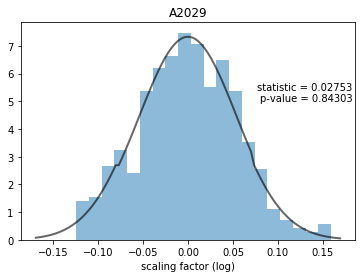

[23.723770107261636, 0.2340453894798166, -0.01175571060850462, 0.06604694581446068]


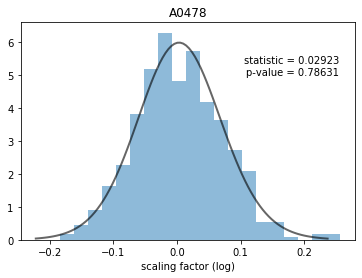

[339.97260543050004, 0.3429185523997359, -0.036197398923190585, 0.07470922621598847]


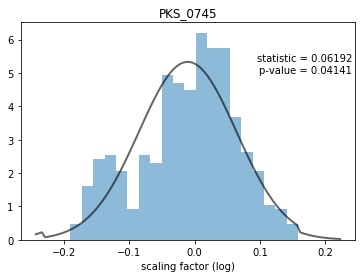

In [56]:
for i in range(0, 3):
    if i == 2 :
        df, nc, loc, scale = stats.nct.fit(planck_fit_data[i], fnc = planck_skew[i]*-1)
    else:
        df, nc, loc, scale = stats.nct.fit(planck_fit_data[i], fnc = planck_skew[i])
    print([df, nc, loc, scale])
    nct_params.append([df, nc, loc, scale])
    x = np.linspace(stats.nct.ppf(0.001, df, nc, loc=loc, scale=scale), 
                    stats.nct.ppf(0.999, df, nc, loc=loc, scale=scale), 100)
    plt.plot(x, stats.nct.pdf(x, df, nc, loc=loc, scale=scale), 'k-', lw=2, alpha=0.6, label='skew-t pdf')
    plt.hist(planck_fit_data[i], bins=20, density=True, alpha=0.5)
    plt.title(planck_names[i])
    plt.xlabel('scaling factor (log)')
    statistic, pval = stats.kstest(planck_fit_data[i], 'nct', [df, nc, loc, scale])
    plt.text(np.mean(x) + 1.85*np.std(x), 5, s='statistic = ' + str(round(statistic,5)) + '\np-value = ' + str(round(pval,5)), horizontalalignment='right')
    #plt.savefig(planck_names[i] + '_commonly_blinded.jpg')
    plt.show()

### Bolocam clusters

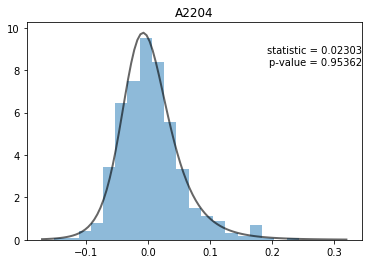

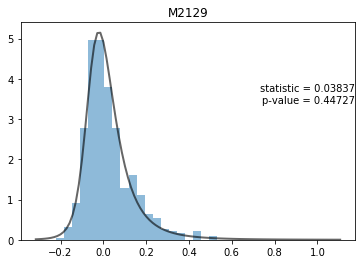

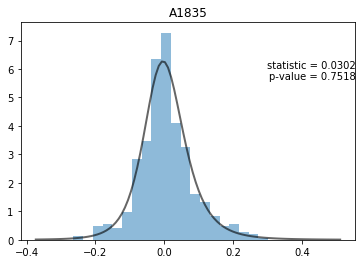

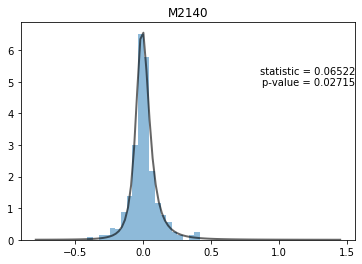

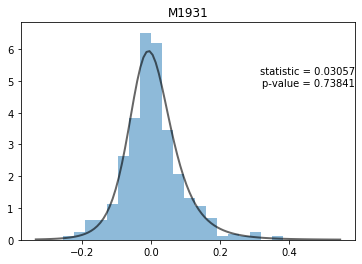

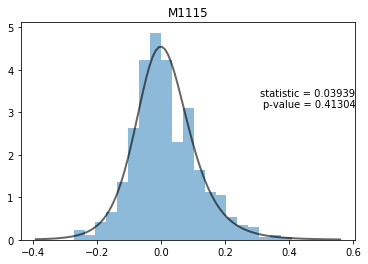

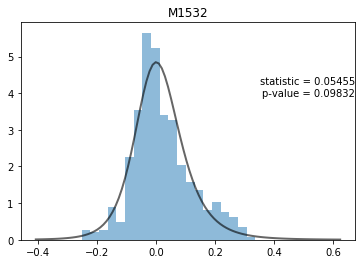

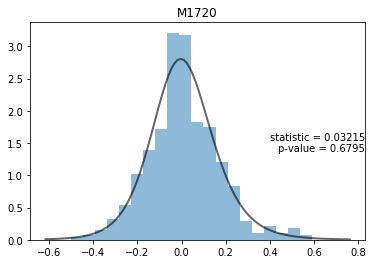

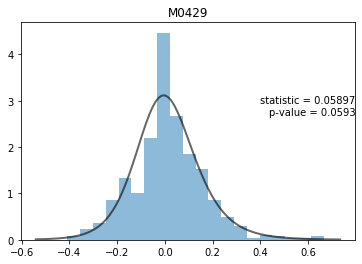

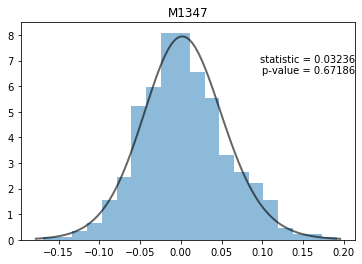

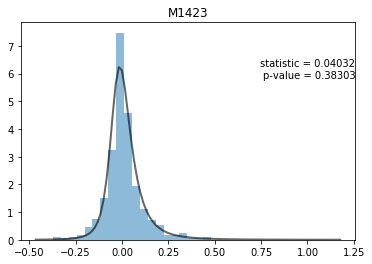

In [57]:
for i in range(0, 11):
    df, nc, loc, scale = stats.nct.fit(bolocam_fit_data[i], fnc = bolocam_skew[i])
    nct_params.append([df, nc, loc, scale])
    x = np.linspace(stats.nct.ppf(0.001, df, nc, loc=loc, scale=scale), 
                    stats.nct.ppf(0.999, df, nc, loc=loc, scale=scale), 100)
    fig, ax = plt.subplots()
    ax.plot(x, stats.nct.pdf(x, df, nc, loc=loc, scale=scale), 'k-', lw=2, alpha=0.6, label='skew-t pdf')
    ax.hist(bolocam_fit_data[i], bins=20, density=True, alpha=0.5)
    ax.set_xlim()
    plt.title(bolocam_names[i])
    statistic, pval = stats.kstest(bolocam_fit_data[i], 'nct', [df, nc, loc, scale])
    plt.text(ax.get_xlim()[1], ax.get_ylim()[1] - 2, s='statistic = ' + str(round(statistic,5)) + '\np-value = ' + str(round(pval,5)), horizontalalignment='right')
    #plt.savefig(bolocam_names[i] + '_commonly_blinded.jpg')
    plt.show()

In [59]:
nct_params[8]

[5.299734759467605,
 0.543657362467623,
 -0.04107934140746494,
 0.08283401102388682]